## 1. Data Cleaning and Preparation:

In [2]:
import pandas as pd
df=pd.read_csv(r"D:\Excelr\Assignments\EDA1\Cardiotocographic.csv")

In [4]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   LB        2105 non-null   float64
 1   AC        2106 non-null   float64
 2   FM        2126 non-null   float64
 3   UC        2126 non-null   float64
 4   DL        2126 non-null   float64
 5   DS        2105 non-null   float64
 6   DP        2105 non-null   float64
 7   ASTV      2126 non-null   float64
 8   MSTV      2126 non-null   float64
 9   ALTV      2126 non-null   float64
 10  MLTV      2105 non-null   float64
 11  Width     2105 non-null   float64
 12  Tendency  2105 non-null   float64
 13  NSP       2105 non-null   float64
dtypes: float64(14)
memory usage: 232.7 KB


In [8]:
#Handling Missing Values: 
df.isnull().sum()
df = df.fillna(df.mean())

In [12]:
#Outlier Detection and Treatment:
from scipy import stats
z_scores = stats.zscore(df.select_dtypes(include='number'))
df_no_outliers = df[(abs(z_scores) < 3).all(axis=1)]

## 2. Statistical Summary:

In [33]:
# Interquartile Range
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

LB          14.000000
AC           0.005606
FM           0.002567
UC           0.004685
DL           0.003289
DS           0.000000
DP           0.000000
ASTV        29.000000
MSTV         1.000000
ALTV        11.000000
MLTV         6.200000
Width       63.000000
Tendency     1.000000
NSP          0.000000
dtype: float64


## 3. Data Visualization:

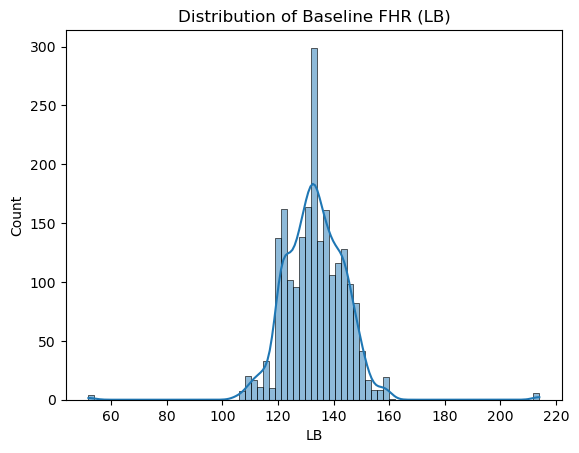

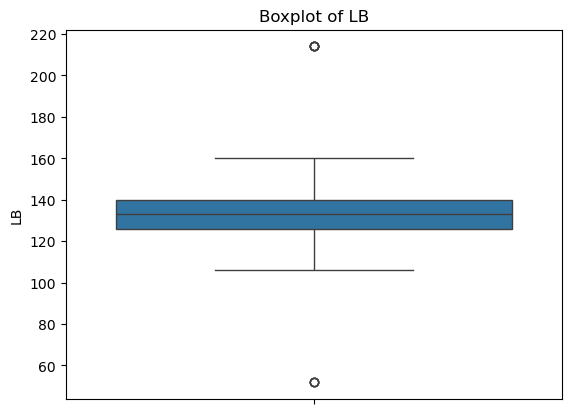

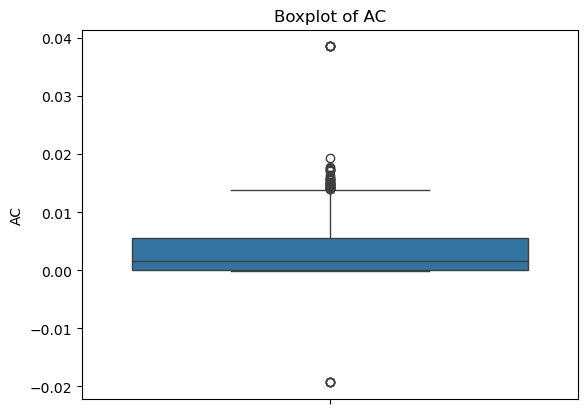

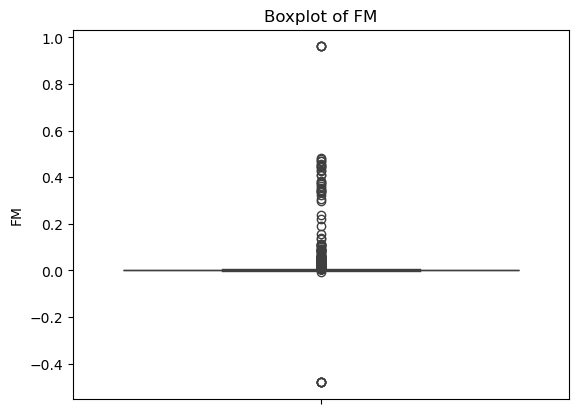

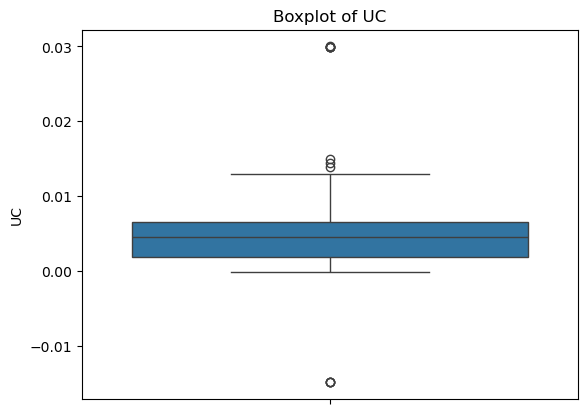

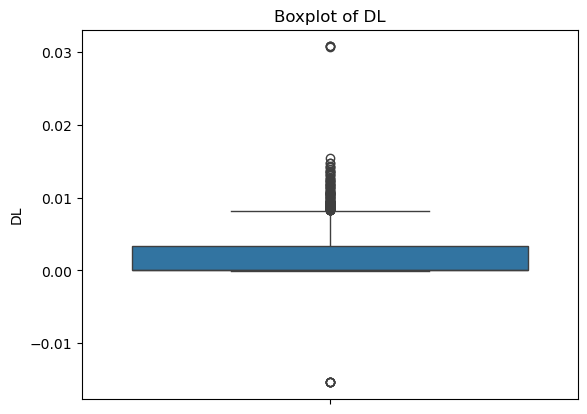

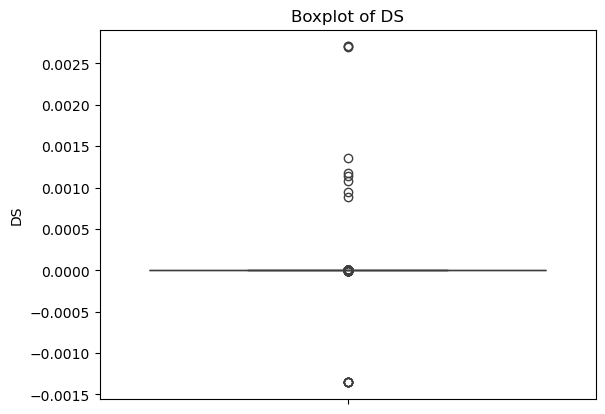

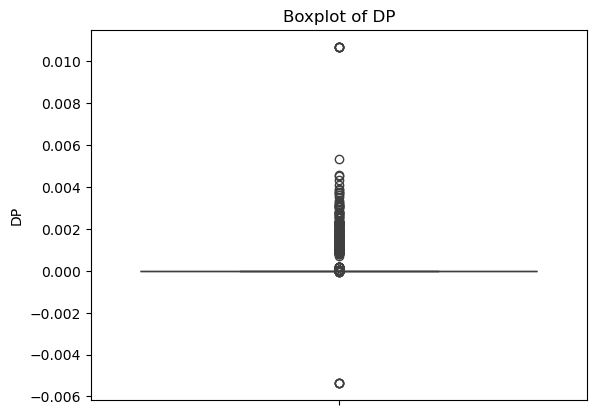

In [47]:
# Distribution of Baseline FHR (LB)
sns.histplot(df['LB'], kde=True)
plt.title("Distribution of Baseline FHR (LB)")
plt.show()

# Boxplots for main features
cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP']
for col in cols:
    sns.boxplot(y=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

**Correlation Analysis**

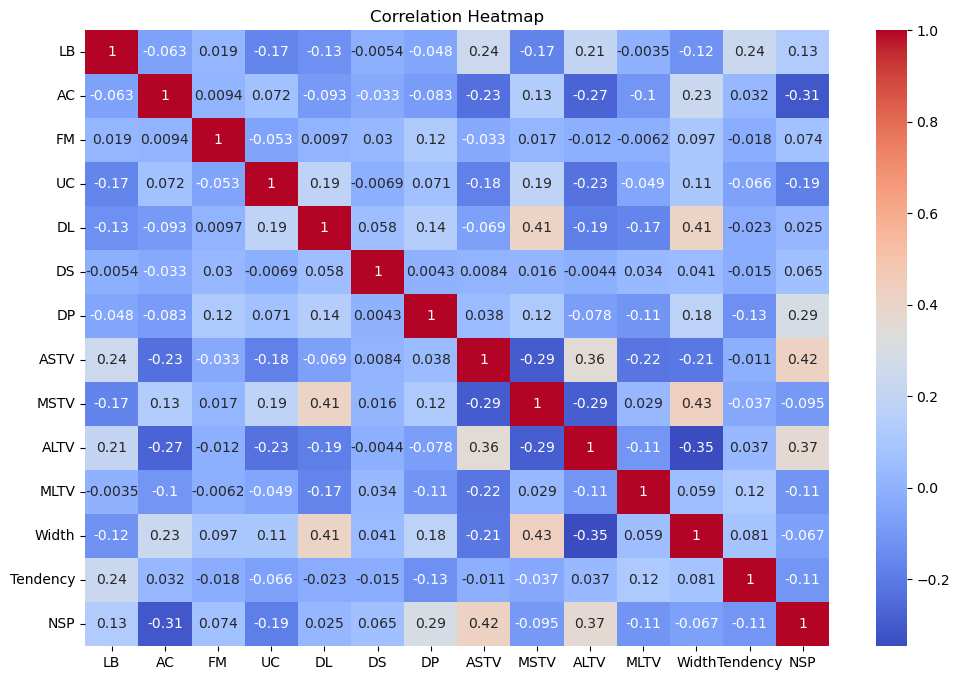

In [54]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

**Target Variable Analysis (NSP)**

## 4. Pattern Recognition and Insights:

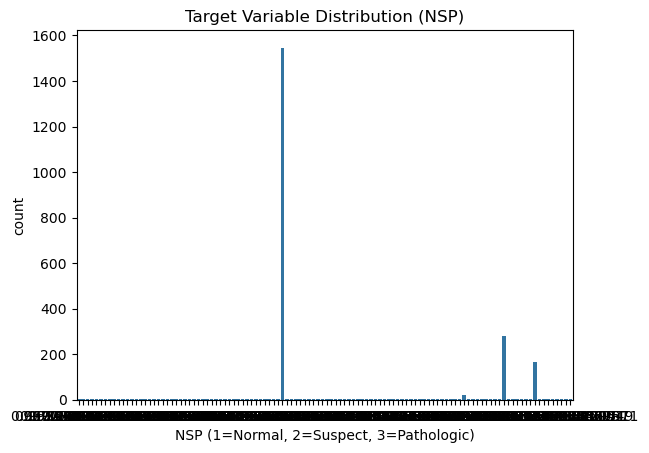

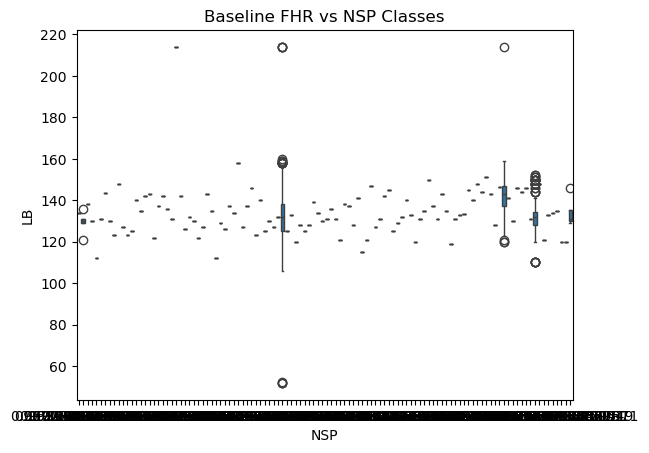

In [57]:
# Distribution of NSP
sns.countplot(x='NSP', data=df)
plt.title("Target Variable Distribution (NSP)")
plt.xlabel("NSP (1=Normal, 2=Suspect, 3=Pathologic)")
plt.show()

# Boxplot: FHR by NSP
sns.boxplot(x='NSP', y='LB', data=df)
plt.title("Baseline FHR vs NSP Classes")
plt.show()

## Pair Plots & Advanced Visualization

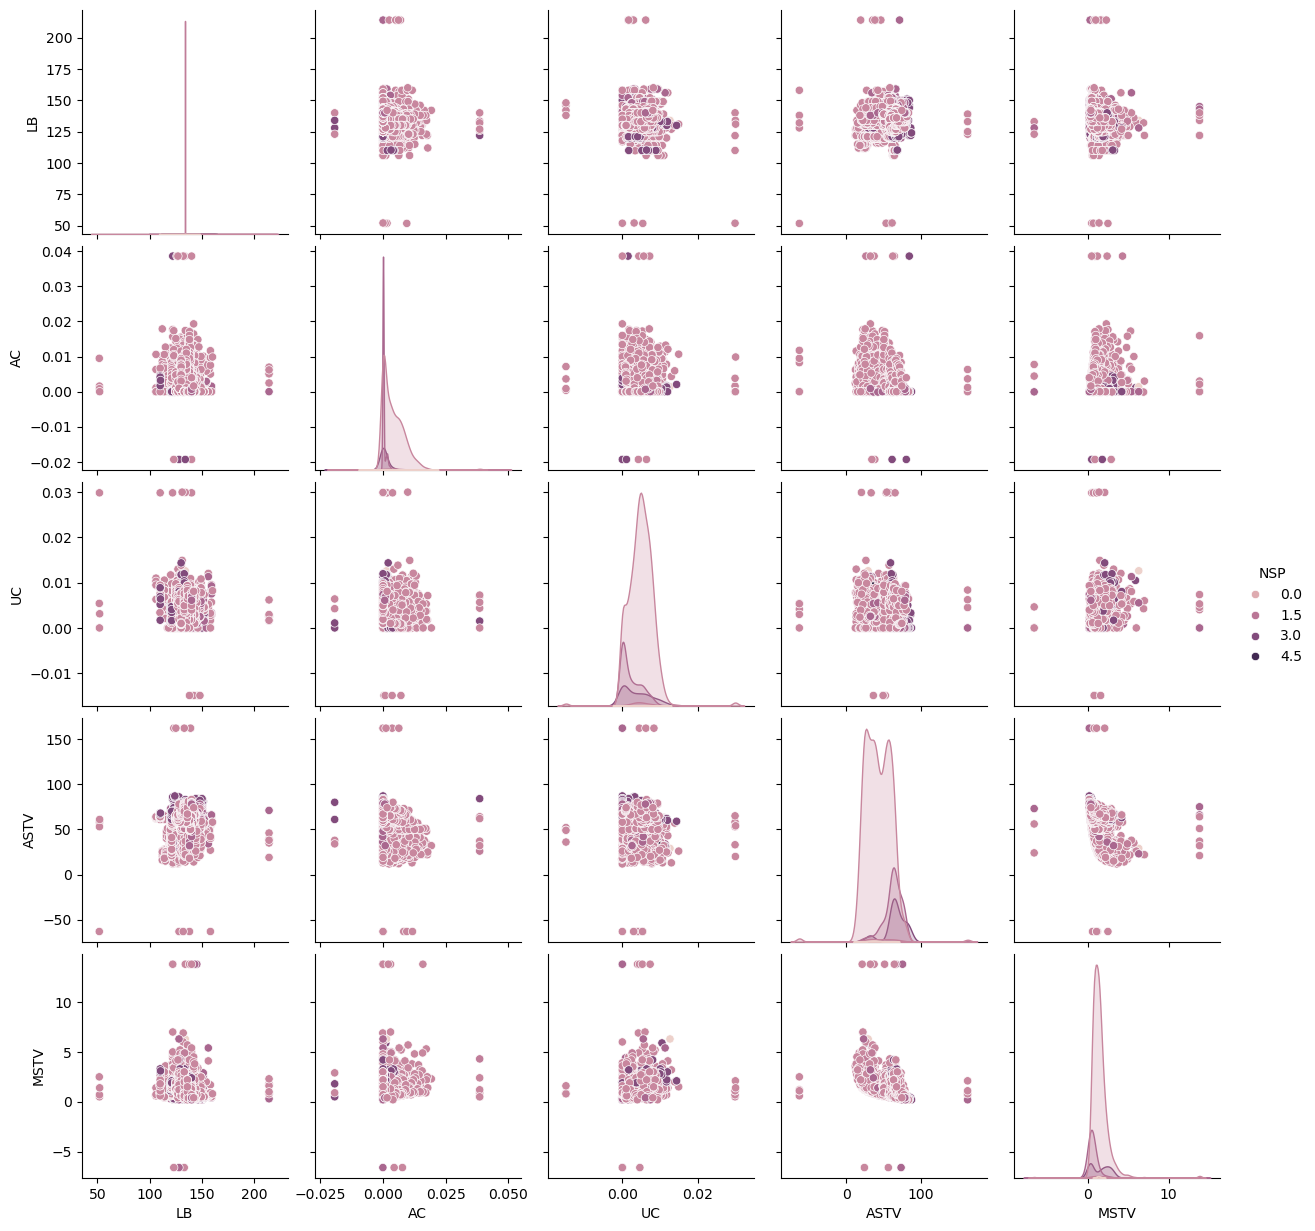

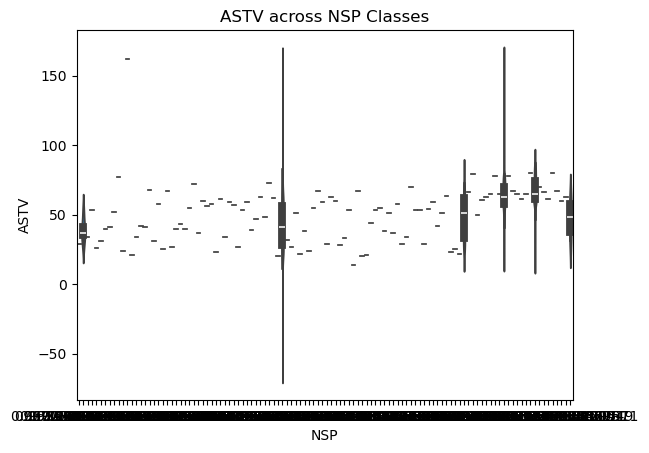

In [63]:
# Pairplot for selected features
sns.pairplot(df[['LB', 'AC', 'UC', 'ASTV', 'MSTV', 'NSP']], hue='NSP')
plt.show()

# Violin plot for variability
sns.violinplot(x='NSP', y='ASTV', data=df)
plt.title("ASTV across NSP Classes")
plt.show()

## 4. Insights & Patterns

- **LB** shows a relatively normal distribution, but with slight differences between NSP classes.
- **ASTV** and **MSTV** seem to have strong relationships with NSP.
- **AC**, **DL**, and **DP** are sparse but may still hold predictive value.

##  5. Conclusion

- Clean data with few to no missing values.
- Some variables show class-separable patterns (e.g., ASTV, MSTV).
- Data is ready for feature engineering or model building.

